In [2]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.plotting as plot 
import functions.data_wrangling as data 
import functions.aos_functions as aos

import matplotlib.patches as patches

import warnings
warnings.filterwarnings('ignore', category=xr.SerializationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

In [3]:
# ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})
ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/srip_datasets/jra55_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})

ds = ds.sel(time=slice('1979', '2016'))

ds_NH = data.seasonal_mean(ds, season='djf')
ds_SH = data.seasonal_mean(ds, season='jas')

corr_NH = xr.corr(ds_NH.div1_pr, ds_NH.ubar, dim='time')
corr_NH = corr_NH.sel(lat=slice(0,85))
corr_NH = corr_NH.sel(level=slice(1000.,10.))

corr_SH = xr.corr(ds_SH.div1_pr, ds_SH.ubar, dim='time')
corr_SH = corr_SH.sel(lat=slice(-85,0))
corr_SH = corr_SH.sel(level=slice(1000.,10.)) 

corr_SH = corr_SH.fillna(0)
corr_NH = corr_NH.fillna(0)

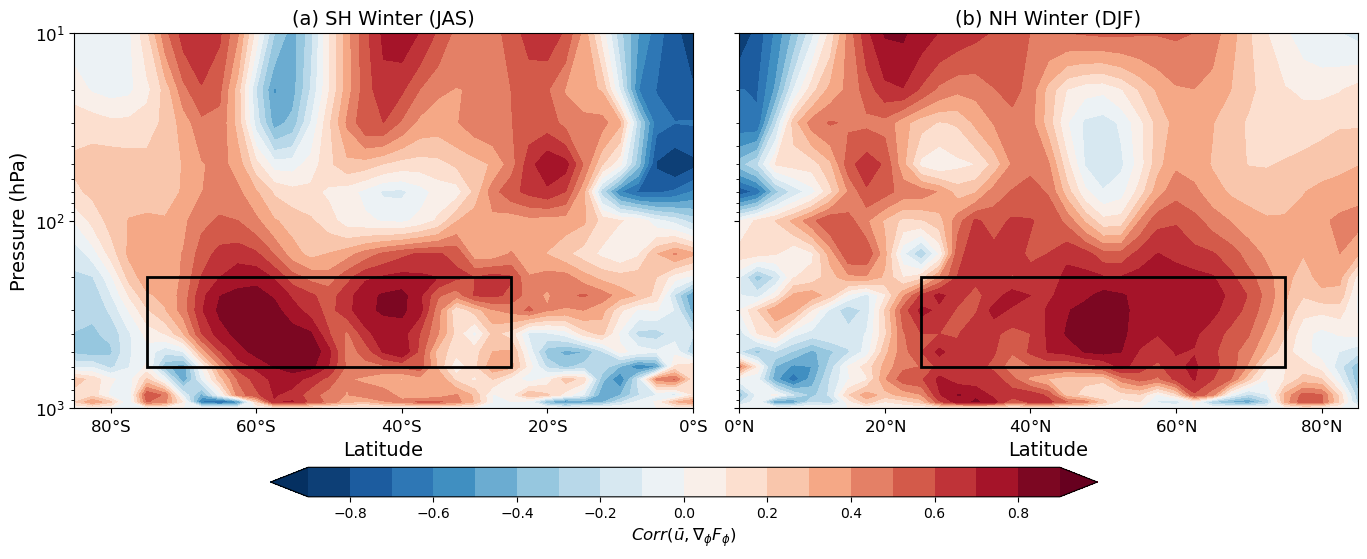

In [4]:
width = 350 #(335/4)*3
height = 150 #(160/4)*3
inches = 1/25.4 
figsize = (width*inches, height*inches)

fig, (ax1, ax2) = plt.subplots(figsize=figsize, ncols=2, sharey=True)

# SH Winter (JJA)
color1 = ax1.contourf(corr_SH.lat.values, corr_SH.level.values, corr_SH,
             cmap='RdBu_r', levels=np.linspace(-0.9,0.9,19), extend='both')
ax1.set_yscale('log')
ax1.invert_yaxis() 

# set titles and labels
ax1.set_ylabel('Pressure (hPa)', fontsize=14)
ax1.set_xlabel('Latitude', fontsize=14)
# Remove existing ticks and labels set by the xarray function
ax1.set_xticks([])
ax1.set_yticks([])
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.yaxis.set_minor_locator(plt.NullLocator())
# name tick labels
ax1.set_xticks([0, -20, -40, -60, -80])
ax1.set_xticklabels(['0$\\degree$S', '20$\\degree$S', '40$\\degree$S', '60$\\degree$S', '80$\\degree$S'], fontsize=12)
ax1.set_yticks([1000., 100., 10.])
ax1.set_yticklabels(['1000', '100', '10'], fontsize=12)

ax1.set_title('(a) SH Winter (JAS)', fontsize=14)
ax1.add_patch(patches.Rectangle((-75., 600.), 50, -400, 
                         fill=False, linewidth=2))

# NH Winter (DJF)
color2 = ax2.contourf(corr_NH.lat.values, corr_NH.level.values, corr_NH,
             cmap='RdBu_r', levels=np.linspace(-0.9,0.9,19), extend='both') 
ax2.set_yscale('log')
ax2.set_xlabel('Latitude', fontsize=14)

# set titles and labels
ax2.set_title('(b) NH Winter (DJF)', fontsize=14)
ax2.set_xticks([0, 20, 40, 60, 80])
ax2.set_xticklabels(['0$\\degree$N', '20$\\degree$N', '40$\\degree$N', '60$\\degree$N', '80$\\degree$N'], fontsize=12)

ax2.add_patch(patches.Rectangle((25., 600.), 50, -400, 
                         fill=False, linewidth=2))

plt.tight_layout()

# colourbar
fig.subplots_adjust(bottom=0.3)
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.05])
cbar = fig.colorbar(color1, cax=cbar_ax, location='bottom')
cbar.set_label('$Corr(\\bar{u}, \\nabla_{\\phi} F_{\\phi})$', fontsize=12)
cbar.ax.tick_params(axis='x', labelsize=10)

# fig.suptitle('Figure 2: Correlation plot showing Eddy Feedback Parameter', fontsize=16, y=1.05)
plt.show()

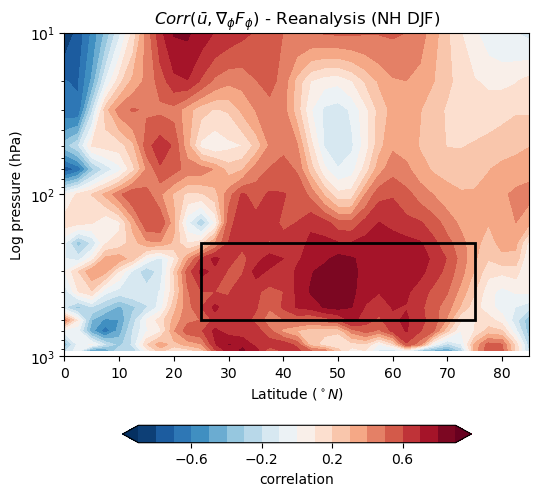

In [11]:
plot.plot_reanalysis_correlation(ds, cut_poles=True, label='Reanalysis (NH DJF)')